## Further Research in the Network

As a continuation of the research we suggest a clafficicatio based on tissues.

For this we can break down the network into subgraphs according to cells within tissues (in this case, glial and neuronal cells in different parts of the brain) and analyze the network to select the most relevant proteins. To do this, we take into account the intracellular expression of proteins (from normal tissues, only to the extent that it is low-medium-high-undetectable) and establish the most likely pathways from given nodes.

The main goal was to compare disease groups to see which proteins are important at the cellular level in a given region, and which may be important in multiple disease groups.

To do this, we need to:
1. Assign disease groups to the nodes of this graph.
2. Create clusters from different cell types to make it easier to analyze and create subgroups based on them.


Problem: the code is very slow (runs for hours) and the connection to the runtime environment was always interrupted, so we were unable to complete even the analysis without disease groups (trial).
The results achieved so far are shown below.

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
!wget https://snap.stanford.edu/biodata/datasets/10000/files/PP-Pathways_ppi.csv.gz -O PP-Pathways_ppi.csv.gz
!wget https://snap.stanford.edu/pathways/bio-pathways-associations.tar.gz -O bio-pathways-associations.tar.gz


--2025-08-04 09:13:46--  https://snap.stanford.edu/biodata/datasets/10000/files/PP-Pathways_ppi.csv.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1683213 (1.6M) [application/x-gzip]
Saving to: ‘PP-Pathways_ppi.csv.gz’

PP-Pathways_ppi.csv 100%[===================>]   1.60M  1.05MB/s    in 1.5s    

2025-08-04 09:13:48 (1.05 MB/s) - ‘PP-Pathways_ppi.csv.gz’ saved [1683213/1683213]

--2025-08-04 09:13:48--  https://snap.stanford.edu/pathways/bio-pathways-associations.tar.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60146 (59K) [application/x-gzip]
Saving to: ‘bio-pathways-associations.tar.gz’

bio-pathways-associ 100%[===================>]  58.74K   280KB/s    in 0.2s    


In [ ]:
csv_file = pd.read_csv('PP-Pathways_ppi.csv.gz', compression='gzip', header=None, names=['node1', 'node2'])

print("Example of the data")
csv_file.head()

Example of the data


,node1,node2
0,1394,2778
1,6331,17999
2,122704,54460
3,2597,2911
4,4790,79155


In [ ]:
%pip install mygene

In [ ]:
import mygene

In [ ]:
pp_csv_file = pd.read_csv('PP-Pathways_ppi.csv.gz', compression='gzip', header=None, names=['node1', 'node2'])

print("Begining of PP-Pathways_ppi.csv.gz")
pp_csv_file.head()

# Creating a graph
G = nx.from_pandas_edgelist(pp_csv_file, "node1", "node2")

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Some nodes: {list(G.nodes)[:5]}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Some edges: {list(G.edges)[:5]}")


Begining of PP-Pathways_ppi.csv.gz
Number of nodes: 21557
Some nodes: [1394, 2778, 6331, 17999, 122704]
Number of edges: 342353
Some edges: [(1394, 2778), (1394, 808), (1394, 801), (1394, 7349), (1394, 2770)]


In [ ]:
def get_data_from_entrez_id(id_list, fields = "symbol, name"):
  # Get protein data from entrez id list
  # Define requred fields with fields value. Possible field values can be found here: https://docs.mygene.info/en/latest/doc/query_service.html#available_fields
  mg = mygene.MyGeneInfo()

  result = mg.querymany(id_list, scopes='entrezgene', fields=fields, species='human')
  return result

In [ ]:
test_id = [1394] # [20947]
meta = get_data_from_entrez_id(test_id)[0]

if "notfound" in list(meta.keys()):
  print("Unsuccessfull test query")
else:
  print("Protein metadata query example with id: ", test_id, " : \n symbol:" , meta["symbol"], "name:  ", meta["name"] )

INFO:biothings.client:querying 1-1 ...
INFO:biothings.client:Finished.


Protein metadata query example with id:  [1394]  : 
 symbol: CRHR1 name:   corticotropin releasing hormone receptor 1


In [ ]:
meta = get_data_from_entrez_id(list(G.nodes))

INFO:biothings.client:querying 1-1000 ...
INFO:biothings.client:querying 1001-2000 ...
INFO:biothings.client:querying 2001-3000 ...
INFO:biothings.client:querying 3001-4000 ...
INFO:biothings.client:querying 4001-5000 ...
INFO:biothings.client:querying 5001-6000 ...
INFO:biothings.client:querying 6001-7000 ...
INFO:biothings.client:querying 7001-8000 ...
INFO:biothings.client:querying 8001-9000 ...
INFO:biothings.client:querying 9001-10000 ...
INFO:biothings.client:querying 10001-11000 ...
INFO:biothings.client:querying 11001-12000 ...
INFO:biothings.client:querying 12001-13000 ...
INFO:biothings.client:querying 13001-14000 ...
INFO:biothings.client:querying 14001-15000 ...
INFO:biothings.client:querying 15001-16000 ...
INFO:biothings.client:querying 16001-17000 ...
INFO:biothings.client:querying 17001-18000 ...
INFO:biothings.client:querying 18001-19000 ...
INFO:biothings.client:querying 19001-20000 ...
INFO:biothings.client:querying 20001-21000 ...
INFO:biothings.client:querying 2100

In [ ]:
# Assign metadata to the network nodes
list_of_unassigned_nodes = []
for n in G.nodes:
  m = meta[list(G.nodes).index(n)]  # Get metadata for the current node

  if "notfound" in list(m.keys()):
    list_of_unassigned_nodes.append(n)
    continue

  G.nodes[n]["symbol"] = m["symbol"]
  G.nodes[n]["name"] = m["name"]

print(f"Number of unassigned nodes: {len(list_of_unassigned_nodes)}")

Number of unassigned nodes: 4236


In [ ]:
display(meta)


[{'query': '1394',
  '_id': '1394',
  '_score': 26.492044,
  'name': 'corticotropin releasing hormone receptor 1',
  'symbol': 'CRHR1'},
 {'query': '2778',
  '_id': '2778',
  '_score': 26.492044,
  'name': 'GNAS complex locus',
  'symbol': 'GNAS'},
 {'query': '6331',
  '_id': '6331',
  '_score': 25.97051,
  'name': 'sodium voltage-gated channel alpha subunit 5',
  'symbol': 'SCN5A'},
 {'query': '17999', 'notfound': True},
 {'query': '122704',
  '_id': '122704',
  '_score': 26.492044,
  'name': 'mitochondrial ribosomal protein L52',
  'symbol': 'MRPL52'},
 {'query': '54460',
  '_id': '54460',
  '_score': 26.492044,
  'name': 'mitochondrial ribosomal protein S21',
  'symbol': 'MRPS21'},
 {'query': '2597',
  '_id': '2597',
  '_score': 26.492373,
  'name': 'glyceraldehyde-3-phosphate dehydrogenase',
  'symbol': 'GAPDH'},
 {'query': '2911',
  '_id': '2911',
  '_score': 26.492044,
  'name': 'glutamate metabotropic receptor 1',
  'symbol': 'GRM1'},
 {'query': '4790',
  '_id': '4790',
  '_scor

In [ ]:
#creating node df
data = [ ... ]
node_df = pd.json_normalize(meta)
node_df = node_df[['symbol','_id', 'name','query', '_score']]
#display(node_df)


# drop data that doesnt have "_id" value
id_node_df = node_df.dropna(subset=['_id']) #drop
missing_ids = node_df[node_df['_id'].isna()] #separate df for missing data


# drop data that doesnt have "symbol" value
symbol_node_df = id_node_df.dropna(subset=['symbol'])
missing_symbols = id_node_df[id_node_df['symbol'].isna()]

#set index and header
symbol_node_df['symbol'] = symbol_node_df['symbol'].astype(str)
symbol_node_df['_id'] = symbol_node_df['_id'].astype(str)
#symbol_node_df  = symbol_node_df.set_index(['symbol', '_id'])

#display(id_node_df)
#display(missing_ids)
display(symbol_node_df)
#display(missing_symbols)



,symbol,_id,name,query,_score
0,CRHR1,1394,corticotropin releasing hormone receptor 1,1394,26.492044
1,GNAS,2778,GNAS complex locus,2778,26.492044
2,SCN5A,6331,sodium voltage-gated channel alpha subunit 5,6331,25.970510
4,MRPL52,122704,mitochondrial ribosomal protein L52,122704,26.492044
5,MRPS21,54460,mitochondrial ribosomal protein S21,54460,26.492044
...,...,...,...,...,...
21539,PPP1R3G,648791,protein phosphatase 1 regulatory subunit 3G,648791,27.283820
21540,MIR1181,100302213,microRNA 1181,100302213,26.492044
21544,LILRA1,11024,leukocyte immunoglobulin like receptor A1,11024,27.281353
21548,CYB5R4,51167,cytochrome b5 reductase 4,51167,27.281353


In order no connect the dataset to their associated tissues we got the Tissue expression data (protein expression in different cells in different tissues)

The Database can be found in The Protein Atlas: https://www.proteinatlas.org/download/tsv/normal_ihc_data.tsv.zip







In [ ]:
!wget "https://www.proteinatlas.org/download/tsv/normal_ihc_data.tsv.zip" -O "normal_ihc_data.tsv.zip"

--2025-08-05 09:54:24--  https://www.proteinatlas.org/download/tsv/normal_ihc_data.tsv.zip
Resolving www.proteinatlas.org (www.proteinatlas.org)... 130.237.227.251
Connecting to www.proteinatlas.org (www.proteinatlas.org)|130.237.227.251|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5721486 (5.5M) [application/zip]
Saving to: ‘normal_ihc_data.tsv.zip’

normal_ihc_data.tsv 100%[===================>]   5.46M  2.86MB/s    in 1.9s    

2025-08-05 09:54:27 (2.86 MB/s) - ‘normal_ihc_data.tsv.zip’ saved [5721486/5721486]



In [ ]:
tissue_df = pd.read_csv('normal_ihc_data.tsv.zip',sep='\t', compression='zip', header=0)
print("Begining of normal_ihc_data.tsv.zip")


display(symbol_node_df)

#rename 'Gene name' to 'symbol'
tissue_df = tissue_df.rename(columns={"Gene name": "symbol"})
#tissue_df = tissue_df.rename_axis('symbol')

display(tissue_df)

tissue_df = tissue_df.dropna(subset=['symbol'])
symbol_node_df = symbol_node_df.dropna(subset=['symbol'])
df_merged_tissue = tissue_df.merge(
    symbol_node_df[['symbol', '_id']], on='symbol', how='left'
)

display(df_merged_tissue)

#exp_tissue_df = tissue_df.T
#display(exp_tissue_df)

NameError: name 'pd' is not defined

Pipeline

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


# 1) Get the expression data

df_expr = df_merged_tissue.copy()


display(df_expr)


# 2) Nested mapping
#    Structure: gene_tissue_map[gene][tissue] = {'cell_types': [...], 'levels': [...]}

grouped = (
    df_expr
    .groupby(['symbol', 'Tissue'])
    .agg({
        'Cell type': lambda s: list(s.unique()),
        'Level':     lambda s: list(s.unique())
    })
    .reset_index()
)

protein_tissue_map = {}
for protein, subdf in grouped.groupby('symbol'):
    # dict for all genes, keys - tissue info
    tissue_dict = {}
    for _, row in subdf.iterrows():
        tissue_dict[row['Tissue']] = {
            'cell_types': row['Cell type'],
            'levels':     row['Level']
        }
    protein_tissue_map[protein] = tissue_dict

,Gene,symbol,Tissue,IHC tissue name,Cell type,Level,Reliability,_id
0,ENSG00000000003,TSPAN6,Adipose tissue,Adipose tissue,adipocytes,Not detected,Approved,7105
1,ENSG00000000003,TSPAN6,Adrenal gland,Adrenal gland,glandular cells,Not detected,Approved,7105
2,ENSG00000000003,TSPAN6,Appendix,Appendix,glandular cells,Medium,Approved,7105
3,ENSG00000000003,TSPAN6,Appendix,Appendix,lymphoid tissue,Not detected,Approved,7105
4,ENSG00000000003,TSPAN6,Bone marrow,Bone marrow,hematopoietic cells,Not detected,Approved,7105
...,...,...,...,...,...,...,...,...
1198340,ENSG00000291316,ENSG00000291316,Tonsil,Tonsil,germinal center cells,Low,Approved,NaN
1198341,ENSG00000291316,ENSG00000291316,Tonsil,Tonsil,non-germinal center cells,Low,Approved,NaN
1198342,ENSG00000291316,ENSG00000291316,Tonsil,Tonsil,squamous epithelial cells,Medium,Approved,NaN
1198343,ENSG00000291316,ENSG00000291316,Urinary bladder,Urinary bladder,urothelial cells,High,Approved,NaN


In [ ]:
#Giving rank for the nodes by expression level - goal: modify the edge weight by it

level_rank = {'Not detected': 0, 'Low': 1, 'Medium': 2, 'High': 3}
protein_level = {}

use_cell_type = True  # te állítod be: True, ha cell type alapú lekérdezés volt

for protein, tissues in protein_tissue_map.items():
    if use_cell_type:
        relevant_levels = []

        for tissue, info in tissues.items():
            # only if both keys exist and they are not empty
            has_cell = info.get("cell_types")
            has_levels = info.get("levels")

            if has_cell and has_levels:
                relevant_levels.extend(info["levels"])

        if relevant_levels:
            protein_level[protein] = max(relevant_levels, key=lambda x: level_rank.get(x, 0))
        else:
            protein_level[protein] = "Not detected"  # or "NA"
    else:
        protein_level[protein] = "NA"  # if we didnt search in the cell level

In [ ]:
# 4) PPI edges

ppi_df = csv_file.copy()

# 5) creating network

G = nx.Graph()

# 5a) adding nodes:
all_proteins = set(ppi_df['node1']).union(ppi_df['node2'])
for protein in all_proteins:
    G.add_node(
        protein,
        tissues = protein_tissue_map.get(protein, {}),
        level   = protein_level.get(protein, 'Not detected')
    )

# 5) adding the edge: weight = row.score vagy 1.0
for _, row in ppi_df.iterrows():
    G.add_edge(
        row['node1'],
        row['node2'],
        weight = row.get('score', 1.0)
    )

In [ ]:
# 6) Cut out „NOT DETECTED” nodes-OK
# True, if we want to search in the cell type level
use_cell_type_network = True  # vagy False, if we are in the tissue level

level_prob = {'High': 1.0, 'Medium': 0.7, 'Low': 0.3, 'Not detected': 0.0}
G_adj = G.copy()

if use_cell_type_network:
    # 6a) delete nodes with 0 probability
    to_remove = [n for n, d in G_adj.nodes(data=True) if level_prob.get(d.get('level'), 0.0) == 0.0]
    G_adj.remove_nodes_from(to_remove)

    # 6b) Calculation of edge probability
    for u, v, attrs in G_adj.edges(data=True):
        p_u = level_prob.get(G_adj.nodes[u].get('level'), 0.0)
        p_v = level_prob.get(G_adj.nodes[v].get('level'), 0.0)
        attrs['edge_prob'] = p_u * p_v

In [ ]:
# Defining functions
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def path_probability(path, graph):
    prob = 1.0
    for a, b in zip(path, path[1:]):
        prob *= graph.edges[a, b].get('edge_prob', 0.0)
    return prob

def analyze_subgraph(G, tissue=None, cell_type=None):
    # filter
    nodes = [n for n,d in G.nodes(data=True)
             if d.get('tissue')==tissue and (cell_type is None or d.get('cell_type')==cell_type)]
    subG = G.subgraph(nodes).copy()
    # globál metriks
    n, m = subG.number_of_nodes(), subG.number_of_edges()
    density = nx.density(subG)
    avg_deg = sum(dict(subG.degree()).values())/n if n else 0
    try: comps = nx.number_connected_components(subG)
    except: comps = 'N/A'
    print(f"Network (nodes={n}, edges={m}, avg_deg={avg_deg:.2f}, density={density:.3f}, comps={comps})")
    # centralities
    deg = nx.degree_centrality(subG)
    btw = nx.betweenness_centrality(subG)
    try: eig = nx.eigenvector_centrality(subG, max_iter=200)
    except: eig = {u:0 for u in subG}
    df = pd.DataFrame({
        'degree': pd.Series(deg),
        'betweenness': pd.Series(btw),
        'eigenvector': pd.Series(eig)
    }).sort_values('degree', ascending=False)
    display(df)
    # top20 bar
    df.head(20).plot.bar(figsize=(12,5), title="Top20 centralities"); plt.show()
    # visualization
    pos = nx.spring_layout(subG, seed=42)
    nx.draw(subG, pos, node_color="#87CEEB", with_labels=True, node_size=400, edge_color="#999999")
    plt.title(f"PPI ({tissue}, {cell_type})"); plt.axis('off'); plt.show()

def identify_valuable_nodes(graph, top_n=10, btw_k=20, pagerank_alpha=0.85, pagerank_tol=1e-4):
    # filtering
    if not nx.is_connected(graph):
        comp = max(nx.connected_components(graph), key=len)
        G0 = graph.subgraph(comp).copy()
    else:
        G0 = graph
    # weight check
    has_w = any('edge_prob' in d for *_,d in G0.edges(data=True))
    w = 'edge_prob' if has_w else None
    N = G0.number_of_nodes()
    norm = (N-1) or 1
    # degree number (weighted vagy sima)
    if has_w:
        degree = {u: G0.degree(u, weight='edge_prob')/norm for u in G0}
    else:
        degree = nx.degree_centrality(G0)
    # approx betweenness
    btw = nx.betweenness_centrality(G0, k=min(btw_k,N), weight=w, seed=42)
    # pagerank
    pr = nx.pagerank(G0, alpha=pagerank_alpha, tol=pagerank_tol, weight=w)
    # avg_edge_prob
    if has_w:
        avgp = {u: sum(d['edge_prob'] for *_,d in G0.edges(u,data=True))/max(1,G0.degree(u)) for u in G0}
    else:
        avgp = {u:1.0 for u in G0}
    df = pd.DataFrame({
        'degree': pd.Series(degree),
        'betweenness': pd.Series(btw),
        'pagerank': pd.Series(pr),
        'avg_edge_prob': pd.Series(avgp)
    })
    df['composite_score'] = 0.3*df['degree']+0.3*df['betweenness']+0.2*df['pagerank']+0.2*df['avg_edge_prob']
    return df.nlargest(top_n, 'composite_score')

def most_probable_path_from_node(graph, source, max_length=4):
    best=(None,0.0)
    for tgt in graph.nodes():
        if tgt==source: continue
        for path in nx.all_simple_paths(graph, source, tgt, cutoff=max_length):
            p = path_probability(path, graph)
            if p>best[1]: best=(path,p)
    return {'path':best[0], 'probability':best[1]}

def visualize_graph(G, level='cell_type'):
    pos = nx.spring_layout(G, seed=42)
    if level=='cell_type':
        cmap={'High':'#FF0000','Medium':'#FFA500','Low':'#FFFF00'}
        colors=[cmap.get(G.nodes[u].get('level'),'#CCCCCC') for u in G]
    else:
        colors=['#999999']*G.number_of_nodes()
    nx.draw(G, pos, node_color=colors, with_labels=True, node_size=500, edge_color='#BBBBBB')
    if level=='cell_type':
        handles=[Line2D([0],[0],marker='o',color='w',label=l,markerfacecolor=cmap[l],markersize=8)
                 for l in cmap]
        plt.legend(handles=handles,title='Level')
    plt.title(f"PPI network ({level})"); plt.axis('off'); plt.show()


**Example**

In [ ]:
# DEBUG: checking the tissue values
print("Elérhető Tissue értékek:")
print(df_merged_tissue["Tissue"].dropna().unique())

# Filter
target_tissue    = "Hippocampus"
target_cell_type = None  # ha None, ne szűrj cell type-ra

# creating dinamic mask
mask = df_merged_tissue["Tissue"].eq(target_tissue)
if target_cell_type is not None:
    mask &= df_merged_tissue["Cell type"].unique.eq(target_cell_type)

# Filtering, convert _id
filtered = (
    df_merged_tissue.loc[mask]
    .dropna(subset=["_id"])
    .copy()
)
filtered["_id"] = filtered["_id"].astype(str)

print(f"Szűrt rekordok száma: {len(filtered)}")
display(filtered.head())

Elérhető Tissue értékek:
['Adipose tissue' 'Adrenal gland' 'Appendix' 'Bone marrow' 'Breast'
 'Bronchus' 'Caudate' 'Cerebellum' 'Cerebral cortex' 'Cervix' 'Colon'
 'Duodenum' 'Endometrium' 'Epididymis' 'Esophagus' 'Fallopian tube'
 'Gallbladder' 'Heart muscle' 'Hippocampus' 'Kidney' 'Liver' 'Lung'
 'Lymph node' 'Nasopharynx' 'Oral mucosa' 'Ovary' 'Pancreas'
 'Parathyroid gland' 'Placenta' 'Prostate' 'Rectum' 'Salivary gland'
 'Seminal vesicle' 'Skeletal muscle' 'Skin' 'Small intestine'
 'Smooth muscle' 'Soft tissue' 'Spleen' 'Stomach' 'Testis' 'Thyroid gland'
 'Tonsil' 'Urinary bladder' 'Vagina' 'Hypothalamus' 'Hair' 'Retina'
 'Lactating breast' 'Thymus' 'Cartilage' 'Eye' 'Pituitary gland'
 'Choroid plexus' 'Dorsal raphe' 'Substantia nigra' 'Sole of foot']
Szűrt rekordok száma: 24720


,Gene,symbol,Tissue,IHC tissue name,Cell type,Level,Reliability,_id
33,ENSG00000000003,TSPAN6,Hippocampus,Hippocampus,glial cells,Not detected,Approved,7105
34,ENSG00000000003,TSPAN6,Hippocampus,Hippocampus,neuronal cells,Not detected,Approved,7105
113,ENSG00000000419,DPM1,Hippocampus,Hippocampus,glial cells,Low,Approved,8813
114,ENSG00000000419,DPM1,Hippocampus,Hippocampus,neuronal cells,Medium,Approved,8813
190,ENSG00000000457,SCYL3,Hippocampus,Hippocampus,glial cells,Not detected,Approved,57147


In [ ]:
import networkx as nx

# 2) converting PPI- graph nodes to string
G_str = nx.relabel_nodes(G, lambda x: str(x))

# 3) getting the filtered _id-s
node_ids = filtered["_id"].tolist()
G_sub    = G_str.subgraph(node_ids).copy()

print(f"Algráf: {G_sub.number_of_nodes()} node, {G_sub.number_of_edges()} él")


Algráf: 12345 node, 235196 él


In [ ]:
#Annotation of the node attributes (symbol, level, tissue, cell_type)

for n in G_sub.nodes():
    row = filtered.loc[filtered["_id"] == n].iloc[0]
    G_sub.nodes[n].update({
        "symbol":    row["symbol"],
        "level":     row.get("Level", "Not detected"),
        "tissue":    target_tissue,
        "cell_type": target_cell_type
    })

# Print to check
print("Néhány node attribútuma:", list(G_sub.nodes(data=True))[:3])


Néhány node attribútuma: [('1', {'tissues': {}, 'level': 'Not detected', 'symbol': 'A1BG', 'tissue': 'Hippocampus', 'cell_type': None}), ('2', {'tissues': {}, 'level': 'Not detected', 'symbol': 'A2M', 'tissue': 'Hippocampus', 'cell_type': None}), ('131076', {'tissues': {}, 'level': 'Not detected', 'symbol': 'MIX23', 'tissue': 'Hippocampus', 'cell_type': None})]


**Brain_neuronal cells, and glia cells**

In [ ]:

# Defining tissue-cell type pairs that we are interested in
tissue_cell_map = {
    "Cerebellum":       ["neuronal cells", "glial cells"],
    "Hippocampus":  ["neuronal cells", "glial cells"],
    "Cerebral cortex":        ["neuronal cells",  "glial cells"]
}

#print out to check
print("Elemzendő párok:")
for t, cells in tissue_cell_map.items():
    for c in cells:
        print(f" - Tissue={t!r}, Cell type={c!r}")

Elemzendő párok:
 - Tissue='Cerebellum', Cell type='neuronal cells'
 - Tissue='Cerebellum', Cell type='glial cells'
 - Tissue='Hippocampus', Cell type='neuronal cells'
 - Tissue='Hippocampus', Cell type='glial cells'
 - Tissue='Cerebral cortex', Cell type='neuronal cells'
 - Tissue='Cerebral cortex', Cell type='glial cells'



=== Elemzés: Tissue = Cerebellum, Cell type = neuronal cells ===
Szűrt rekordok száma: 0
Nincsenek adatok ehhez a kombinációhoz, kihagyjuk.

=== Elemzés: Tissue = Cerebellum, Cell type = glial cells ===
Szűrt rekordok száma: 3
Algráf mérete: 3 node, 1 edge
Network (nodes=3, edges=1, avg_deg=0.67, density=0.333, comps=3)


,degree,betweenness,eigenvector
1462,1.0,0.0,1.000000e+00
7783,0.0,0.0,9.536743e-07
79809,0.0,0.0,9.536743e-07


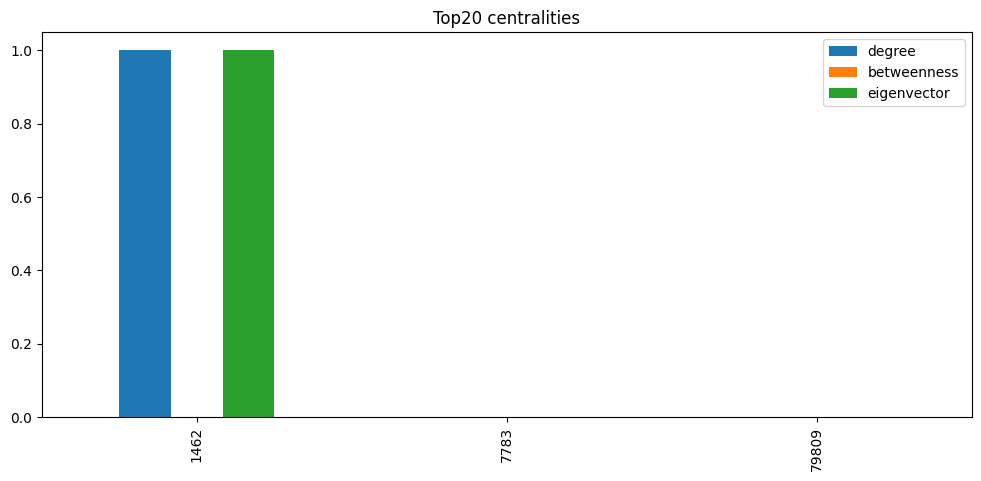

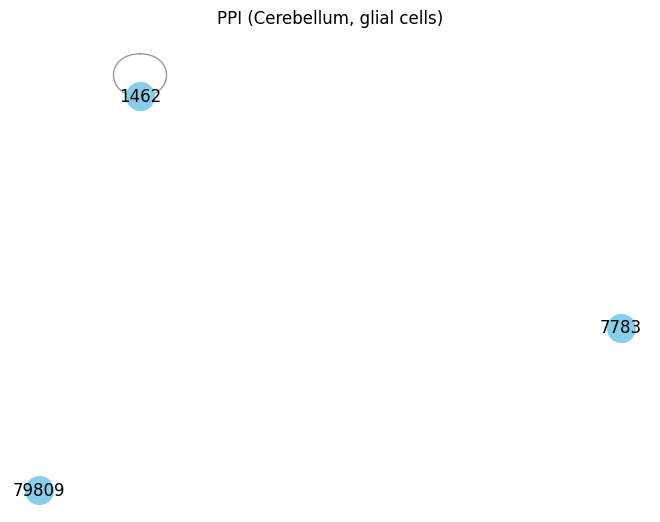

Top 10 legértékesebb nodus:


,degree,betweenness,pagerank,avg_edge_prob,composite_score
1462,1,0.0,1.0,1.0,0.7


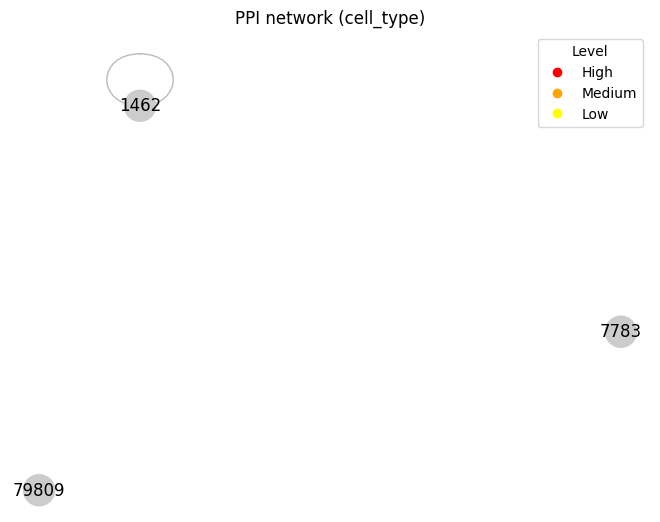


=== Elemzés: Tissue = Hippocampus, Cell type = neuronal cells ===
Szűrt rekordok száma: 12328
Algráf mérete: 12323 node, 234033 edge
Network (nodes=12323, edges=234033, avg_deg=37.98, density=0.003, comps=139)


,degree,betweenness,eigenvector
4914,0.144782,0.047766,1.087656e-01
351,0.136260,0.085472,5.132124e-02
1994,0.124980,0.068270,7.383163e-02
7514,0.088054,0.025626,5.558457e-02
8452,0.086350,0.017902,9.663911e-02
...,...,...,...
23452,0.000000,0.000000,4.836927e-34
56163,0.000000,0.000000,4.836927e-34
266675,0.000000,0.000000,4.836927e-34
286234,0.000000,0.000000,4.836927e-34


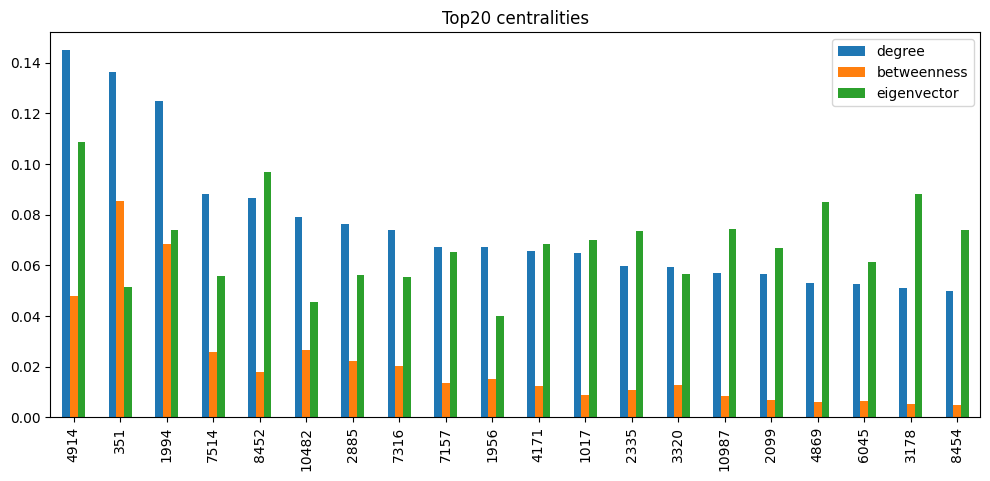

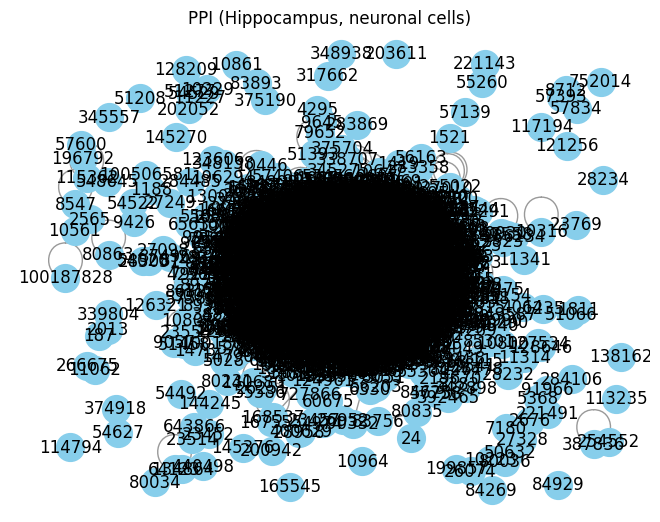

Top 10 legértékesebb nodus:


,degree,betweenness,pagerank,avg_edge_prob,composite_score
351,0.137849,0.067211,0.012112,1.0,0.263940
4914,0.146470,0.060686,0.003890,1.0,0.262925
1994,0.126437,0.054770,0.009677,1.0,0.256297
2885,0.077011,0.032165,0.002719,1.0,0.233297
7514,0.089080,0.011921,0.003708,1.0,0.231042
8452,0.087356,0.009143,0.002825,1.0,0.229515
10482,0.079885,0.011293,0.003999,1.0,0.228153
83987,0.041790,0.048186,0.000734,1.0,0.227140
7316,0.074631,0.009272,0.002944,1.0,0.225760
7157,0.067980,0.012229,0.001701,1.0,0.224403


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


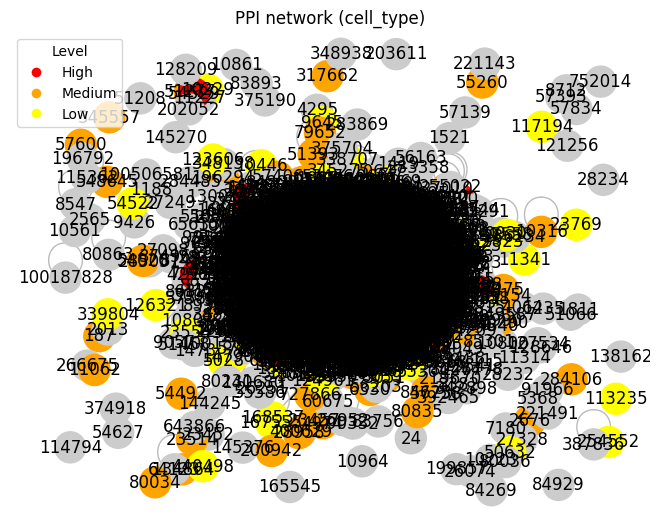


=== Elemzés: Tissue = Hippocampus, Cell type = glial cells ===
Szűrt rekordok száma: 12342
Algráf mérete: 12337 node, 234961 edge
Network (nodes=12337, edges=234961, avg_deg=38.09, density=0.003, comps=139)


,degree,betweenness,eigenvector
4914,0.144861,0.047695,1.081801e-01
351,0.136511,0.085537,5.102139e-02
1994,0.125162,0.068280,7.379968e-02
7514,0.088359,0.025662,5.550270e-02
8452,0.086414,0.017832,9.634262e-02
...,...,...,...
348938,0.000000,0.000000,4.604393e-34
284106,0.000000,0.000000,4.604393e-34
128209,0.000000,0.000000,4.604393e-34
187,0.000000,0.000000,4.604393e-34


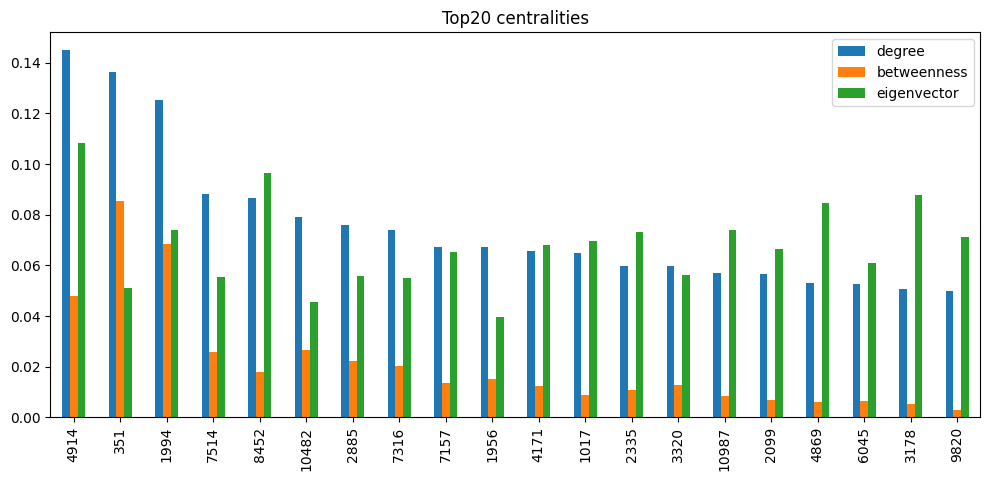

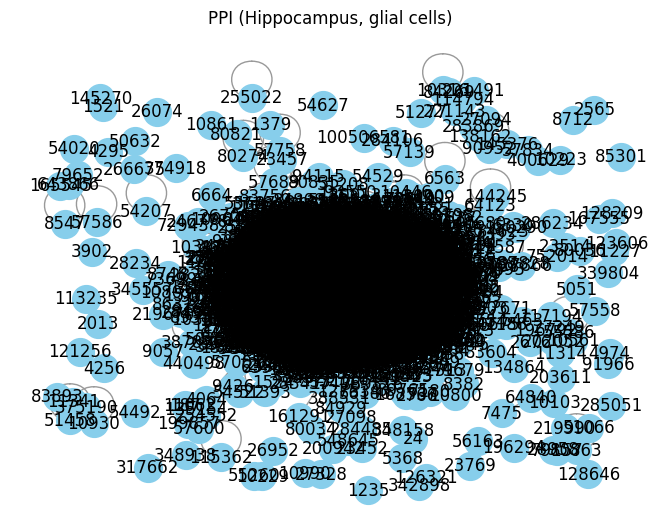

Top 10 legértékesebb nodus:


,degree,betweenness,pagerank,avg_edge_prob,composite_score
1994,0.126620,0.089079,0.009658,1.0,0.266641
4914,0.146547,0.048791,0.003886,1.0,0.259379
351,0.138101,0.039491,0.012107,1.0,0.255699
7514,0.089388,0.021652,0.003708,1.0,0.234054
8452,0.087420,0.017126,0.002823,1.0,0.231928
10482,0.080039,0.018630,0.003998,1.0,0.230400
7316,0.074791,0.023031,0.002944,1.0,0.229935
1956,0.067984,0.028283,0.001889,1.0,0.229258
2885,0.076923,0.013987,0.002718,1.0,0.227817
7157,0.068066,0.011072,0.001699,1.0,0.224081


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


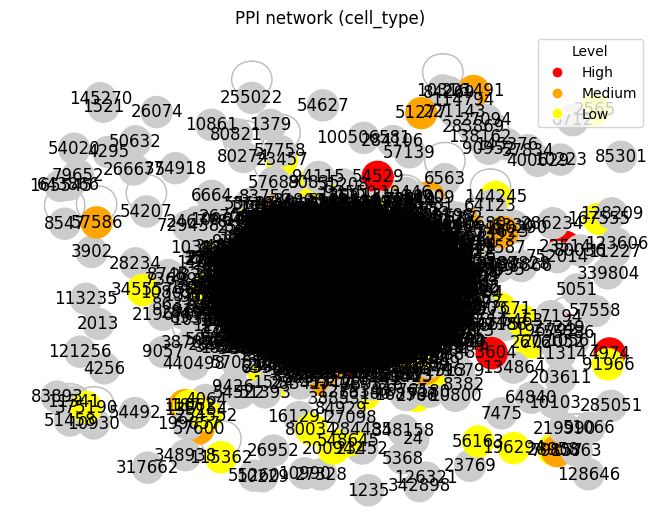


=== Elemzés: Tissue = Cerebral cortex, Cell type = neuronal cells ===
Szűrt rekordok száma: 12346
Algráf mérete: 12341 node, 234555 edge
Network (nodes=12341, edges=234555, avg_deg=38.01, density=0.003, comps=144)


In [ ]:
# doing the analysis
import networkx as nx

for tissue, cell_types in tissue_cell_map.items():
    for cell in cell_types:
        print(f"\n=== Elemzés: Tissue = {tissue}, Cell type = {cell} ===")

        # 1) filtering
        filtered = (
            df_merged_tissue
            .loc[
                (df_merged_tissue["Tissue"]    == tissue) &
                (df_merged_tissue["Cell type"] == cell)
            ]
            .dropna(subset=["_id"])
            .assign(_id=lambda d: d["_id"].astype(str))
        )
        print("Szűrt rekordok száma:", len(filtered))
        if filtered.empty:
            print("Nincsenek adatok ehhez a kombinációhoz, kihagyjuk.")
            continue

        # 2) creating subraphs
        G_str = nx.relabel_nodes(G, lambda x: str(x))
        G_sub = G_str.subgraph(filtered["_id"].tolist()).copy()
        print("Algráf mérete:", G_sub.number_of_nodes(), "node,", G_sub.number_of_edges(), "edge")

        # 3) Node annotation
        for n in G_sub.nodes():
            row = filtered.loc[filtered["_id"] == n].iloc[0]
            G_sub.nodes[n].update({
                "symbol":    row["symbol"],
                "level":     row.get("Level", "Not detected"),
                "tissue":    tissue,
                "cell_type": cell
            })

        # 4) statistics for the network and the nodes (with a function)
        analyze_subgraph(G_sub, tissue=tissue, cell_type=cell)

        # 5) most valuable nodes
        top10 = identify_valuable_nodes(G_sub, top_n=10)
        print("Top 10 legértékesebb nodus:")
        display(top10)

        # 6) Most likely pathway
        #src = top10.index[0]
        #best = most_probable_path_from_node(G_sub, source=src, max_length=4)
        #print("Legvalószínűbb útvonal innen:", best)

        # 7) Visualization of the graph
        visualize_graph(G_sub, level="cell_type")

Egész egyben